In [1]:
# PROBLEM 2
# 
# Figure out what value of the boost velocity will allow the spaceship to 
# return safely to earth. In order to do this, you will 
# have to fill in the moon_position, acceleration, 
# and apply_boost functions. Further details are below.
# 

import math 
import numpy as np
from udacityplots import *

earth_mass = 5.97e24 # kg
earth_radius = 6.378e6 # m (at equator)
gravitational_constant = 6.67e-11 # m3 / kg s2
moon_mass = 7.35e22 # kg
moon_radius = 1.74e6 # m
moon_distance = 400.5e6 # m (actually, not at all a constant)
moon_period = 27.3 * 24.0 * 3600. # s
moon_initial_angle = math.pi / 180. * -61. # radian

total_duration = 12. * 24. * 3600. # s
marker_time = 0.5 * 3600. # s
tolerance = 100000. # m

In [2]:
moon_initial_angle

-1.064650843716541

In [3]:
def unit(vector):
    return vector / np.linalg.norm(vector)

In [4]:
# Task 1: Compute the moon's position (a vector) at time t. Let it start at moon_initial_angle, not on the horizontal axis.   


def moon_position(time):
    rad = time * 2*math.pi / moon_period
    rad = moon_initial_angle + rad
    px = np.cos(rad) * moon_distance
    py = np.sin(rad) * moon_distance
    position = np.array([px, py])
    return position

# Task 2: Compute the spacecraft's acceleration due to gravity


def acceleration(time, position):
    
    moon_pos = moon_position(time)
    vector_to_moon = position - moon_pos
    accel_moon = gravitational_constant * (moon_mass / vector_to_moon**2)
    accel_earth = gravitational_constant * (earth_mass / position**2)
    
    acc = accel_earth + accel_moon
    # distance = np.linalg.norm(postion)

    return acc  

axes = matplotlib.pyplot.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')

# Task 5: (First see the other tasks below.) What is the appropriate boost to apply?
# Try -10 m/s, 0 m/s, 10 m/s, 50 m/s and 100 m/s and leave the correct amount in as you submit the solution.

boost = 10.

In [5]:
def acceleration(time, spaceship_position):

    moon_pos = moon_position(time)
    vector_from_moon = spaceship_position - moon_pos
    vector_from_earth = spaceship_position
    acc = -gravitational_constant * (earth_mass / numpy.linalg.norm(vector_from_earth)**3 * vector_from_earth
                                     + moon_mass / numpy.linalg.norm(vector_from_moon)**3 * vector_from_moon)
    return acc 

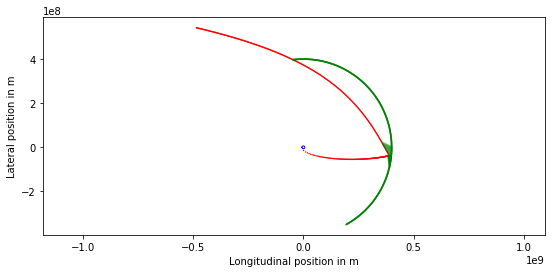

In [7]:
def apply_boost():

    # Do not worry about the arrays position_list, velocity_list, and times_list.  
    # They are simply used for plotting and evaluating your code, so none of the 
    # code that you add should involve them.
    
    boost = 50. # m/s Change this to the correct value from the list above after everything else is done.
    position_list = [numpy.array([-6.701e6, 0.])] # m
    velocity_list = [numpy.array([0., -10.818e3])] # m / s
    times_list = [0]
    position = position_list[0]
    velocity = velocity_list[0]
    current_time = 0.
    h = 0.1 # s, set as initial step size right now but will store current step size
    h_new = h # s, will store the adaptive step size of the next step
    mcc2_burn_done = False
    dps1_burn_done = False

    while current_time < total_duration:
        #Task 3: Include a retrograde rocket burn at 101104 seconds that reduces the velocity by 7.04 m/s
        # and include a rocket burn that increases the velocity at 212100 seconds by the amount given in the variable called boost.
        # Both velocity changes should happen in the direction of the rocket's motion at the time they occur.
        
        if current_time >= 101104. and mcc2_burn_done == False:
            velocity -= unit(velocity)*7.04
            mcc2_burn_done = True
            
        elif current_time >= 212100. and dps1_burn_done == False:
            velocity -= unit(velocity)*boost
            dps1_burn_done = True

        #Task 4: Implement Heun's method with adaptive step size. Note that the time is advanced at the end of this while loop.
        x_e = position + h * velocity
        v_e = velocity + h * acceleration(current_time, position)
        position = position + h * ((velocity+v_e)/2.)
        velocity = velocity + h * ((acceleration(current_time, position)+acceleration(current_time+h, x_e))/2.)
        
        lte_e = np.linalg.norm(x_e - position) + total_duration * np.linalg.norm(v_e - velocity)
        h_new = h * np.sqrt(tolerance/lte_e)
        
        h_new = min(0.5 * marker_time, max(0.1, h_new)) # restrict step size to reasonable range
            
        current_time += h
        h = h_new
        position_list.append(position.copy())
        velocity_list.append(velocity.copy())
        times_list.append(current_time)

    return position_list, velocity_list, times_list, boost

position, velocity, current_time, boost = apply_boost()

@show_plot
def plot_path(position_list, times_list):
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    previous_marker_number = -1;
    for position, current_time in zip(position_list, times_list):
         if current_time >= marker_time * previous_marker_number:
            previous_marker_number += 1
            matplotlib.pyplot.scatter(position[0], position[1], s = 2., facecolor = 'r', edgecolor = 'none')
            moon_pos = moon_position(current_time)
            if numpy.linalg.norm(position - moon_pos) < 30. * moon_radius: 
                axes.add_line(matplotlib.lines.Line2D([position[0], moon_pos[0]], [position[1], moon_pos[1]], alpha = 0.3, c = 'g')) 
    axes.add_patch(matplotlib.patches.CirclePolygon((0., 0.), earth_radius, facecolor = 'none', edgecolor = 'b'))
    for i in range(int(total_duration / marker_time)):
        moon_pos = moon_position(i * marker_time)
        axes.add_patch(matplotlib.patches.CirclePolygon(moon_pos, moon_radius, facecolor = 'none', edgecolor = 'g', alpha = 0.7))

    matplotlib.pyplot.axis('equal')

plot_path(position, current_time)


In [8]:
boost_list = [-10, 0, 10, 50, 100]

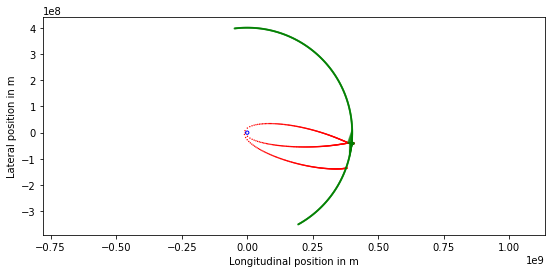

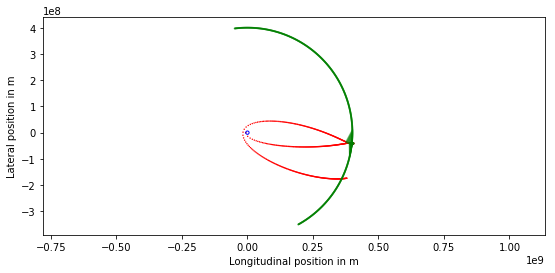

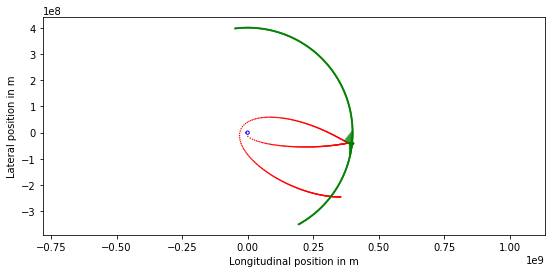

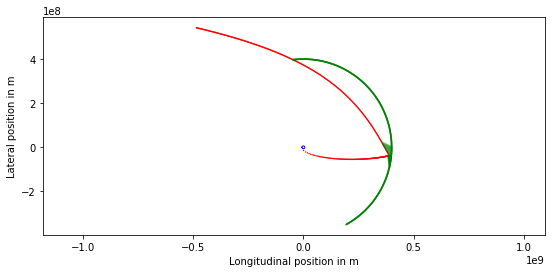

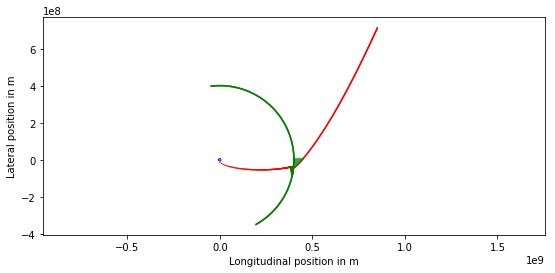

In [13]:
for b in boost_list: 
    def apply_boost():

        # Do not worry about the arrays position_list, velocity_list, and times_list.  
        # They are simply used for plotting and evaluating your code, so none of the 
        # code that you add should involve them.

        boost = b # m/s Change this to the correct value from the list above after everything else is done.
        position_list = [numpy.array([-6.701e6, 0.])] # m
        velocity_list = [numpy.array([0., -10.818e3])] # m / s
        times_list = [0]
        position = position_list[0]
        velocity = velocity_list[0]
        current_time = 0.
        h = 0.1 # s, set as initial step size right now but will store current step size
        h_new = h # s, will store the adaptive step size of the next step
        mcc2_burn_done = False
        dps1_burn_done = False

        while current_time < total_duration:
            #Task 3: Include a retrograde rocket burn at 101104 seconds that reduces the velocity by 7.04 m/s
            # and include a rocket burn that increases the velocity at 212100 seconds by the amount given in the variable called boost.
            # Both velocity changes should happen in the direction of the rocket's motion at the time they occur.

            if current_time >= 101104. and mcc2_burn_done == False:
                velocity -= unit(velocity)*7.04
                mcc2_burn_done = True

            elif current_time >= 212100. and dps1_burn_done == False:
                velocity -= unit(velocity)*boost
                dps1_burn_done = True

            #Task 4: Implement Heun's method with adaptive step size. Note that the time is advanced at the end of this while loop.
            x_e = position + h * velocity
            v_e = velocity + h * acceleration(current_time, position)
            position = position + h * ((velocity+v_e)/2.)
            velocity = velocity + h * ((acceleration(current_time, position)+acceleration(current_time+h, x_e))/2.)

            lte_e = np.linalg.norm(x_e - position) + total_duration * np.linalg.norm(v_e - velocity)
            h_new = h * np.sqrt(tolerance/lte_e)

            h_new = min(0.5 * marker_time, max(0.1, h_new)) # restrict step size to reasonable range

            current_time += h
            h = h_new
            position_list.append(position.copy())
            velocity_list.append(velocity.copy())
            times_list.append(current_time)

        return position_list, velocity_list, times_list, boost

    position, velocity, current_time, boost = apply_boost()

    @show_plot
    def plot_path(position_list, times_list):
        axes = matplotlib.pyplot.gca()
        axes.set_xlabel('Longitudinal position in m')
        axes.set_ylabel('Lateral position in m')
        previous_marker_number = -1;
        for position, current_time in zip(position_list, times_list):
             if current_time >= marker_time * previous_marker_number:
                previous_marker_number += 1
                matplotlib.pyplot.scatter(position[0], position[1], s = 2., facecolor = 'r', edgecolor = 'none')
                moon_pos = moon_position(current_time)
                if numpy.linalg.norm(position - moon_pos) < 30. * moon_radius: 
                    axes.add_line(matplotlib.lines.Line2D([position[0], moon_pos[0]], [position[1], moon_pos[1]], alpha = 0.3, c = 'g')) 
        axes.add_patch(matplotlib.patches.CirclePolygon((0., 0.), earth_radius, facecolor = 'none', edgecolor = 'b'))
        for i in range(int(total_duration / marker_time)):
            moon_pos = moon_position(i * marker_time)
            axes.add_patch(matplotlib.patches.CirclePolygon(moon_pos, moon_radius, facecolor = 'none', edgecolor = 'g', alpha = 0.7))

        matplotlib.pyplot.axis('equal')

    plot_path(position, current_time)
